East Yiedma Production Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#Uplode our data from excel into pandas data frame
data="Production data.xlsx"
df1=pd.read_excel(data, sheet_name='Daily production')
df2=pd.read_excel(data,sheet_name='OFM_SC')

In [3]:
df1.head()

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,AA,Pump_depth,Unnamed: 12
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,NaN,NaN,NaN
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,NaN,NaN,NaN
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,NaN,NaN,NaN
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,NaN,NaN,NaN
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,NaN,NaN,NaN


In [4]:
df2.head()

,Completion,WELL,zone,field,LONGITUDE,LATITUDE,X,Y,WELL_DEPTH
0,Rizk-2D-AEB,Rizk-2D,AEB,Rizk,NaN,NaN,425252.109,873814.724,17400
1,Rizk-2D-Al-Dol,Rizk-2D,AL-Dol,Rizk,NaN,NaN,425252.109,873814.724,17400
2,Rizk-2D-BAH,Rizk-2D,BAH,Rizk,NaN,NaN,425252.109,873814.724,17400
3,Rizk-4ST-Al-Dol,Rizk-4ST,AL-Dol,Rizk,NaN,NaN,424883.798,873203.398,12205
4,Rizk-E1-BAH,Rizk-E1,BAH,Rizk,NaN,NaN,425163.392,874149.106,14756


In [5]:
#Join two tables with together
df=pd.merge(df1,df2, how='left',left_on='HEADER_ID',right_on='Completion').drop(['Completion','WELL', 'Pump_depth','Unnamed: 12', 'LONGITUDE', 'LATITUDE', 'AA'], axis=1)

In [6]:
df.head()

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0


In [7]:
#Make a new column for the total Fluid (oil + water)
df['TOTAL_FLUID']=df['ALLOCATED_OIL']+df['ALLOCATED_WATER']

In [8]:
df

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0000,0.0,0.0000,0.000000,24.00,NF,KHAR,SR,409966.000,909089.000,14381.0,245.000
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0000,0.0,76.0000,0.000000,24.00,NF,KHAR,SR,409966.000,909089.000,14381.0,254.000
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0000,86.0,0.0000,0.000000,24.00,NF,KHAR,SR,409966.000,909089.000,14381.0,211.000
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0000,113.0,70.0000,0.000000,24.00,NF,KHAR,SR,409966.000,909089.000,14381.0,540.000
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0000,106.0,40.0000,0.000000,24.00,NF,KHAR,SR,409966.000,909089.000,14381.0,448.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18545,Rizk-E1ST-BAH,Rizk-E1ST,2024-07-02,10.0,34.2000,0.0,41.2500,0.000000,18.00,SRP,BAH,Rizk,425163.392,874149.106,9807.0,75.450
18546,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-02,65.0,230.9970,13.0,3396.0810,56.277787,23.75,ESP,BAH-TOP KHAR,SR,409828.690,909097.190,9540.0,3627.078
18547,SR-5-BAH-KHAR,SR-5,2024-07-02,90.0,272.1605,27.0,2892.8395,99.206167,23.75,ESP,BAH-KHAR,SR,409720.000,909160.000,10300.0,3165.000
18548,SR-01-MBAH,SR-1,2024-07-02,20.0,0.0000,0.0,478.0000,NaN,12.00,SRP,NaN,NaN,NaN,NaN,NaN,478.000


In [9]:
df.dtypes

HEADER_ID                     object
Well                          object
DATE                  datetime64[ns]
Well Head Pressure           float64
ALLOCATED_OIL                float64
ALLOCATED_GAS                float64
ALLOCATED_WATER              float64
GOR                          float64
Hours Day                    float64
Artifical Lift                object
zone                          object
field                         object
X                            float64
Y                            float64
WELL_DEPTH                   float64
TOTAL_FLUID                  float64
dtype: object

In [10]:
# make row data names consisitent in the header id column
row_data = {'SR-01-MBAH': 'SR-1-MBAH'}
df['HEADER_ID'] = df['HEADER_ID'].replace(row_data)


In [11]:
#show only numerical values with 3 decimals (.3)
pd.set_option('display.float_format', lambda x:'%.1f' %x)
df

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,245.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,254.0
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,211.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,540.0
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18545,Rizk-E1ST-BAH,Rizk-E1ST,2024-07-02,10.0,34.2,0.0,41.2,0.0,18.0,SRP,BAH,Rizk,425163.4,874149.1,9807.0,75.4
18546,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-02,65.0,231.0,13.0,3396.1,56.3,23.8,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3627.1
18547,SR-5-BAH-KHAR,SR-5,2024-07-02,90.0,272.2,27.0,2892.8,99.2,23.8,ESP,BAH-KHAR,SR,409720.0,909160.0,10300.0,3165.0
18548,SR-1-MBAH,SR-1,2024-07-02,20.0,0.0,0.0,478.0,NaN,12.0,SRP,NaN,NaN,NaN,NaN,NaN,478.0


In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,18550,2017-02-12 14:01:15.299191296,2007-10-07 00:00:00,2014-03-27 00:00:00,2016-11-04 12:00:00,2020-09-22 18:00:00,2024-07-03 00:00:00,NaN
Well Head Pressure,18544.0,235.3,0.0,10.0,20.0,65.0,3700.0,674.1
ALLOCATED_OIL,18545.0,123.9,0.0,27.0,58.1,140.1,1545.0,168.7
ALLOCATED_GAS,18526.0,43.3,0.0,0.0,5.0,20.0,1715.0,124.2
ALLOCATED_WATER,18545.0,366.0,0.0,33.0,232.0,628.0,4686.0,502.8
GOR,18285.0,255.9,0.0,0.0,1.0,75.0,80000.0,1133.2
Hours Day,18528.0,20.1,0.0,24.0,24.0,24.0,25.0,8.2
X,18505.0,414148.9,409720.0,409828.7,409828.7,425163.4,425252.1,6902.3
Y,18505.0,899249.2,873814.7,874149.1,909097.2,909097.2,909160.0,15740.8
WELL_DEPTH,18505.0,11032.0,9540.0,9540.0,10300.0,10300.0,17400.0,2228.2


In [13]:
df.isnull().sum()

HEADER_ID               0
Well                    0
DATE                    0
Well Head Pressure      6
ALLOCATED_OIL           5
ALLOCATED_GAS          24
ALLOCATED_WATER         5
GOR                   265
Hours Day              22
Artifical Lift         27
zone                   45
field                  45
X                      45
Y                      45
WELL_DEPTH             45
TOTAL_FLUID             5
dtype: int64

In [14]:
df[['ALLOCATED_OIL','ALLOCATED_WATER','TOTAL_FLUID']] = df[['ALLOCATED_OIL','ALLOCATED_WATER','TOTAL_FLUID']].fillna(0.0)

In [15]:
df.isnull().sum()

HEADER_ID               0
Well                    0
DATE                    0
Well Head Pressure      6
ALLOCATED_OIL           0
ALLOCATED_GAS          24
ALLOCATED_WATER         0
GOR                   265
Hours Day              22
Artifical Lift         27
zone                   45
field                  45
X                      45
Y                      45
WELL_DEPTH             45
TOTAL_FLUID             0
dtype: int64

In [16]:
#remove all zeros in data
df = df[~(df == 0).all(axis=1)]
df

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,245.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,254.0
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,211.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,540.0
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18545,Rizk-E1ST-BAH,Rizk-E1ST,2024-07-02,10.0,34.2,0.0,41.2,0.0,18.0,SRP,BAH,Rizk,425163.4,874149.1,9807.0,75.4
18546,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-02,65.0,231.0,13.0,3396.1,56.3,23.8,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3627.1
18547,SR-5-BAH-KHAR,SR-5,2024-07-02,90.0,272.2,27.0,2892.8,99.2,23.8,ESP,BAH-KHAR,SR,409720.0,909160.0,10300.0,3165.0
18548,SR-1-MBAH,SR-1,2024-07-02,20.0,0.0,0.0,478.0,NaN,12.0,SRP,NaN,NaN,NaN,NaN,NaN,478.0


In [17]:
#remove all rows by this header id name which was null values for cleaning
df= df[df['HEADER_ID'] != 'SR-1-MBAH']
df

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,245.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,254.0
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,211.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,540.0
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18542,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-01,65.0,234.9,13.0,3415.2,55.3,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3650.1
18543,SR-5-BAH-KHAR,SR-5,2024-07-01,90.0,277.2,27.0,2931.8,97.4,24.0,ESP,BAH-KHAR,SR,409720.0,909160.0,10300.0,3209.0
18545,Rizk-E1ST-BAH,Rizk-E1ST,2024-07-02,10.0,34.2,0.0,41.2,0.0,18.0,SRP,BAH,Rizk,425163.4,874149.1,9807.0,75.4
18546,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-02,65.0,231.0,13.0,3396.1,56.3,23.8,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3627.1


In [18]:
#check if the rows still exist 
if (df['HEADER_ID'] == 'SR-1-MBAH').any():
    print("Rows with 'SR-1-MBAH' still exist.")
else:
    print("All rows with 'SR-1-MBAH' have been dropped.")


All rows with 'SR-1-MBAH' have been dropped.


In [19]:
df['zone'].unique()


array(['KHAR', 'BAH', 'BAH-KHAR', 'DHAB', 'AEB', 'AL-Dol', 'BAH-TOP KHAR',
       nan], dtype=object)

In [20]:
df.isnull().sum()

HEADER_ID               0
Well                    0
DATE                    0
Well Head Pressure      6
ALLOCATED_OIL           0
ALLOCATED_GAS          24
ALLOCATED_WATER         0
GOR                   221
Hours Day              20
Artifical Lift         27
zone                    1
field                   1
X                       1
Y                       1
WELL_DEPTH              1
TOTAL_FLUID             0
dtype: int64

In [21]:
df[df['ALLOCATED_GAS'].isnull()]

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
17614,SR-2-KHAR,SR-2,2023-09-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,KHAR,SR,409828.7,909097.2,9540.0,0.0
17617,SR-2-KHAR,SR-2,2023-09-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,KHAR,SR,409828.7,909097.2,9540.0,0.0
17620,SR-2-KHAR,SR-2,2023-09-08,NaN,0.0,NaN,0.0,NaN,0.0,NaN,KHAR,SR,409828.7,909097.2,9540.0,0.0
17623,SR-2-KHAR,SR-2,2023-09-09,NaN,0.0,NaN,0.0,NaN,0.0,NaN,KHAR,SR,409828.7,909097.2,9540.0,0.0
17624,SR-2-KHAR,SR-2,2023-09-10,NaN,0.0,NaN,0.0,NaN,0.0,NaN,KHAR,SR,409828.7,909097.2,9540.0,0.0
17870,SR-2-MBAH-BAH-TOP KHAR,SR-2,2023-12-05,360.0,399.0,NaN,3233.0,NaN,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3632.0
17873,SR-2-MBAH-BAH-TOP KHAR,SR-2,2023-12-06,360.0,399.0,NaN,3233.0,NaN,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3632.0
17876,SR-2-MBAH-BAH-TOP KHAR,SR-2,2023-12-07,360.0,391.0,NaN,3170.0,NaN,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3561.0
17879,SR-2-MBAH-BAH-TOP KHAR,SR-2,2023-12-08,360.0,390.0,NaN,3242.0,NaN,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3632.0
17882,SR-2-MBAH-BAH-TOP KHAR,SR-2,2023-12-09,360.0,392.0,NaN,3242.0,NaN,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3634.0


In [22]:
df[df['zone'].isnull()]

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
18396,,SR-1,2024-05-25,20.0,0.0,0.0,888.0,NaN,24.0,SRP,NaN,NaN,NaN,NaN,NaN,888.0


In [23]:
df.drop(index=18396)

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,245.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,254.0
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,211.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,540.0
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18542,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-01,65.0,234.9,13.0,3415.2,55.3,24.0,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3650.1
18543,SR-5-BAH-KHAR,SR-5,2024-07-01,90.0,277.2,27.0,2931.8,97.4,24.0,ESP,BAH-KHAR,SR,409720.0,909160.0,10300.0,3209.0
18545,Rizk-E1ST-BAH,Rizk-E1ST,2024-07-02,10.0,34.2,0.0,41.2,0.0,18.0,SRP,BAH,Rizk,425163.4,874149.1,9807.0,75.4
18546,SR-2-MBAH-BAH-TOP KHAR,SR-2,2024-07-02,65.0,231.0,13.0,3396.1,56.3,23.8,ESP,BAH-TOP KHAR,SR,409828.7,909097.2,9540.0,3627.1


In [24]:
df.isnull().sum()

HEADER_ID               0
Well                    0
DATE                    0
Well Head Pressure      6
ALLOCATED_OIL           0
ALLOCATED_GAS          24
ALLOCATED_WATER         0
GOR                   221
Hours Day              20
Artifical Lift         27
zone                    1
field                   1
X                       1
Y                       1
WELL_DEPTH              1
TOTAL_FLUID             0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18506 entries, 0 to 18547
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   HEADER_ID           18506 non-null  object        
 1   Well                18506 non-null  object        
 2   DATE                18506 non-null  datetime64[ns]
 3   Well Head Pressure  18500 non-null  float64       
 4   ALLOCATED_OIL       18506 non-null  float64       
 5   ALLOCATED_GAS       18482 non-null  float64       
 6   ALLOCATED_WATER     18506 non-null  float64       
 7   GOR                 18285 non-null  float64       
 8   Hours Day           18486 non-null  float64       
 9   Artifical Lift      18479 non-null  object        
 10  zone                18505 non-null  object        
 11  field               18505 non-null  object        
 12  X                   18505 non-null  float64       
 13  Y                   18505 non-null  float64       


In [26]:
df['Well'].unique()

array(['SR-1', 'SR-2', 'RIZK-E1', 'SR-6', 'SR-5', 'RIZK-E1ST', 'Rizk-2D',
       'RIZK-2D', 'Rizk-E1ST'], dtype=object)

In [27]:
df['Well']=df['Well'].str.upper()
df.head()

C:\Users\noure\AppData\Local\Temp\ipykernel_25684\1996743470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Well']=df['Well'].str.upper()


,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,245.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,254.0
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,211.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,540.0
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,448.0


In [28]:
df['Well'].unique()

array(['SR-1', 'SR-2', 'RIZK-E1', 'SR-6', 'SR-5', 'RIZK-E1ST', 'RIZK-2D'],
      dtype=object)

In [29]:
df['zone'].unique()

array(['KHAR', 'BAH', 'BAH-KHAR', 'DHAB', 'AEB', 'AL-Dol', 'BAH-TOP KHAR',
       nan], dtype=object)

In [30]:
df.isnull().sum()

HEADER_ID               0
Well                    0
DATE                    0
Well Head Pressure      6
ALLOCATED_OIL           0
ALLOCATED_GAS          24
ALLOCATED_WATER         0
GOR                   221
Hours Day              20
Artifical Lift         27
zone                    1
field                   1
X                       1
Y                       1
WELL_DEPTH              1
TOTAL_FLUID             0
dtype: int64

In [31]:
df[df['zone'].isnull()]

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
18396,,SR-1,2024-05-25,20.0,0.0,0.0,888.0,NaN,24.0,SRP,NaN,NaN,NaN,NaN,NaN,888.0


In [32]:
df.drop(index=18396, inplace=True)


C:\Users\noure\AppData\Local\Temp\ipykernel_25684\579156852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=18396, inplace=True)


In [33]:
if 18396 in df.index:
    print("Index exists")
else:
    print("Index does not exist")

Index does not exist


In [34]:
df['HEADER_ID'].value_counts()

HEADER_ID
Rizk-E1ST-BAH             3692
SR-2-KHAR                 2581
SR-2-BAH                  2329
SR-5-BAH-KHAR             2057
SR-1-BAH                  1624
SR-6-AEB                  1393
SR-5-BAH                   830
SR-5-AEB                   683
SR-1-KHAR                  629
Rizk-E1-BAH                605
Rizk-2D-AEB                571
SR-1-BAH-KHAR              359
SR-2-MBAH-BAH-TOP KHAR     285
SR-5-KHAR                  277
SR-2-BAH-KHAR              250
Rizk-2D-Al-Dol             189
Rizk-E1-DHAB               121
Rizk-2D-BAH                 30
Name: count, dtype: int64

In [35]:
df['Well'].value_counts().reset_index()

,Well,count
0,SR-2,5445
1,SR-5,3847
2,RIZK-E1ST,3692
3,SR-1,2612
4,SR-6,1393
5,RIZK-2D,790
6,RIZK-E1,726


In [36]:
df['ALLOCATED_OIL'].describe()

count   18505.0
mean      124.1
std       168.7
min         0.0
25%        27.3
50%        58.1
75%       140.5
max      1545.0
Name: ALLOCATED_OIL, dtype: float64

In [37]:
rizk_1_est=df[df['Well']=='RIZK-E1ST']
risk_1_est_max=rizk_1_est['ALLOCATED_OIL'].max()
risk_1_est_max

309.6

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18505 entries, 0 to 18547
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   HEADER_ID           18505 non-null  object        
 1   Well                18505 non-null  object        
 2   DATE                18505 non-null  datetime64[ns]
 3   Well Head Pressure  18499 non-null  float64       
 4   ALLOCATED_OIL       18505 non-null  float64       
 5   ALLOCATED_GAS       18481 non-null  float64       
 6   ALLOCATED_WATER     18505 non-null  float64       
 7   GOR                 18285 non-null  float64       
 8   Hours Day           18485 non-null  float64       
 9   Artifical Lift      18478 non-null  object        
 10  zone                18505 non-null  object        
 11  field               18505 non-null  object        
 12  X                   18505 non-null  float64       
 13  Y                   18505 non-null  float64       


In [39]:
df.nunique()

HEADER_ID               18
Well                     7
DATE                  6106
Well Head Pressure     414
ALLOCATED_OIL         4414
ALLOCATED_GAS          614
ALLOCATED_WATER       1258
GOR                   1316
Hours Day               72
Artifical Lift           5
zone                     7
field                    2
X                        6
Y                        6
WELL_DEPTH               6
TOTAL_FLUID           4666
dtype: int64

In [40]:
#sort data with the heighest production oil
df.sort_values(by='ALLOCATED_OIL', ascending= False).head(10)

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
2176,SR-2-BAH,SR-2,2011-07-17,650.0,1545.0,0.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1545.0
2210,SR-2-BAH,SR-2,2011-08-07,630.0,1413.0,84.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1413.0
2208,SR-2-BAH,SR-2,2011-08-06,630.0,1392.0,92.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1392.0
2201,SR-2-BAH,SR-2,2011-08-02,650.0,1328.0,0.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1328.0
2202,SR-2-BAH,SR-2,2011-08-03,650.0,1308.0,51.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1308.0
2206,SR-2-BAH,SR-2,2011-08-05,630.0,1293.0,66.0,0.0,0.0,23.0,NF,BAH,SR,409828.7,909097.2,9540.0,1293.0
2199,SR-2-BAH,SR-2,2011-08-01,650.0,1282.0,0.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1282.0
2205,SR-2-BAH,SR-2,2011-08-04,650.0,1251.0,61.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1251.0
501,SR-2-KHAR,SR-2,2009-02-17,1101.0,1242.0,860.0,0.0,0.0,24.0,NF,KHAR,SR,409828.7,909097.2,9540.0,1242.0
2212,SR-2-BAH,SR-2,2011-08-08,630.0,1225.0,74.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1225.0


In [41]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,X,Y,WELL_DEPTH,TOTAL_FLUID
Well Head Pressure,1.0,0.1,0.2,0.1,-0.0,0.0,-0.2,0.2,0.2,0.1
ALLOCATED_OIL,0.1,1.0,0.5,0.2,-0.1,0.3,-0.3,0.3,-0.1,0.5
ALLOCATED_GAS,0.2,0.5,1.0,-0.1,0.2,0.1,-0.2,0.2,-0.0,0.1
ALLOCATED_WATER,0.1,0.2,-0.1,1.0,-0.1,0.3,-0.4,0.4,-0.1,1.0
GOR,-0.0,-0.1,0.2,-0.1,1.0,0.0,-0.1,0.1,-0.0,-0.1
Hours Day,0.0,0.3,0.1,0.3,0.0,1.0,-0.2,0.2,-0.0,0.4
X,-0.2,-0.3,-0.2,-0.4,-0.1,-0.2,1.0,-1.0,0.2,-0.4
Y,0.2,0.3,0.2,0.4,0.1,0.2,-1.0,1.0,-0.2,0.4
WELL_DEPTH,0.2,-0.1,-0.0,-0.1,-0.0,-0.0,0.2,-0.2,1.0,-0.1
TOTAL_FLUID,0.1,0.5,0.1,1.0,-0.1,0.4,-0.4,0.4,-0.1,1.0


In [42]:
#sns.heatmap(numeric_df.corr(), annot=True)
#plt.rcParams['figure.figsize']=(20,10)
#plt.show()

In [43]:
prod=df.groupby('HEADER_ID').agg ({
    'ALLOCATED_OIL' :['sum', 'count']}).reset_index()
prod_per_wz= prod.sort_values(by=('ALLOCATED_OIL','sum'), ascending=False)
prod_per_wz.columns=['HEADER_ID','ALLOCATED_OIL_SUM','COUNT']
prod_per_wz['AVERAGE_OIL_PRODUCED']=prod_per_wz['ALLOCATED_OIL_SUM']/prod_per_wz['COUNT']
prod_per_wz.reset_index(drop=True)

,HEADER_ID,ALLOCATED_OIL_SUM,COUNT,AVERAGE_OIL_PRODUCED
0,SR-2-BAH,655814.6,2329,281.6
1,SR-2-KHAR,428886.3,2581,166.2
2,SR-1-KHAR,225488.9,629,358.5
3,SR-5-BAH-KHAR,200774.6,2057,97.6
4,Rizk-E1ST-BAH,141085.6,3692,38.2
5,SR-1-BAH,98945.1,1624,60.9
6,SR-5-KHAR,91990.5,277,332.1
7,SR-2-MBAH-BAH-TOP KHAR,89853.6,285,315.3
8,SR-5-AEB,81204.4,683,118.9
9,Rizk-2D-AEB,64736.8,571,113.4


In [44]:
df[df['HEADER_ID'].str.contains('SR-2-BAH')]
#this line to reveal all rows with exact names

,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID
2166,SR-2-BAH,SR-2,2011-07-11,650.0,829.0,0.0,30.0,0.0,20.0,NF,BAH,SR,409828.7,909097.2,9540.0,859.0
2167,SR-2-BAH,SR-2,2011-07-12,650.0,1199.0,0.0,3.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1202.0
2171,SR-2-BAH,SR-2,2011-07-14,650.0,70.0,0.0,0.0,0.0,2.0,NF,BAH,SR,409828.7,909097.2,9540.0,70.0
2173,SR-2-BAH,SR-2,2011-07-15,650.0,251.0,0.0,0.0,0.0,6.0,NF,BAH,SR,409828.7,909097.2,9540.0,251.0
2176,SR-2-BAH,SR-2,2011-07-17,650.0,1545.0,0.0,0.0,0.0,24.0,NF,BAH,SR,409828.7,909097.2,9540.0,1545.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15393,SR-2-BAH-KHAR,SR-2,2021-11-03,0.0,0.0,0.0,0.0,0.0,0.0,SRP,BAH-KHAR,SR,409828.7,909097.2,9540.0,0.0
15397,SR-2-BAH-KHAR,SR-2,2021-11-04,0.0,0.0,0.0,0.0,0.0,0.0,SRP,BAH-KHAR,SR,409828.7,909097.2,9540.0,0.0
15401,SR-2-BAH-KHAR,SR-2,2021-11-05,0.0,0.0,0.0,0.0,0.0,0.0,SRP,BAH-KHAR,SR,409828.7,909097.2,9540.0,0.0
15405,SR-2-BAH-KHAR,SR-2,2021-11-06,0.0,0.0,0.0,0.0,0.0,0.0,SRP,BAH-KHAR,SR,409828.7,909097.2,9540.0,0.0


Histogram, it shows the distrubution of our data of oil production 
positively skew data (skewed to the right)

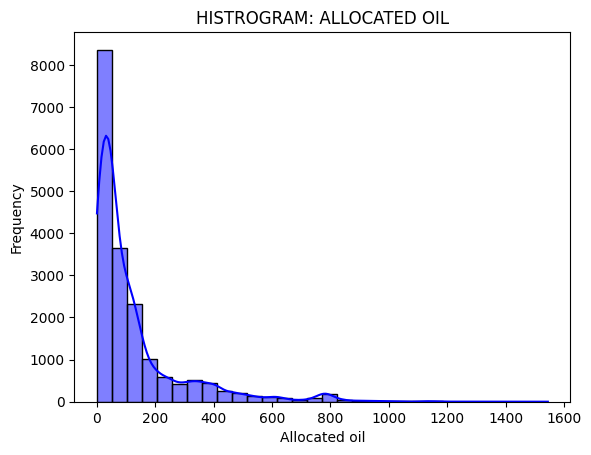

In [45]:

sns.histplot(data=df, x='ALLOCATED_OIL', bins=30,color='b', kde=True)
plt.title('HISTROGRAM: ALLOCATED OIL')
plt.xlabel('Allocated oil')
plt.ylabel('Frequency')
plt.show()


Company production chart over time

In [46]:
company=df.groupby(['Well', 'DATE'])['ALLOCATED_OIL'].sum().reset_index()
lineplot=px.line(company,x='DATE',y='ALLOCATED_OIL', title='Company Oil Production by Well', color='Well', width=1200, height=600)
lineplot.show()


In [47]:
company = df.groupby('DATE')['ALLOCATED_OIL'].sum().reset_index()

# Creating the line plot with a green line and updated title
lineplot = px.line(company, x='DATE', y='ALLOCATED_OIL', 
                   title='Company Production', 
                   width=1300, height=600, 
                   line_shape='linear')

# Updating the line color to green
lineplot.update_traces(line=dict(color='green'))

# Showing the plot
lineplot.show()

In [48]:
df['WATER_CUT']=df['ALLOCATED_WATER']/df['TOTAL_FLUID']
df.head()

C:\Users\noure\AppData\Local\Temp\ipykernel_25684\1642151583.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HEADER_ID,Well,DATE,Well Head Pressure,ALLOCATED_OIL,ALLOCATED_GAS,ALLOCATED_WATER,GOR,Hours Day,Artifical Lift,zone,field,X,Y,WELL_DEPTH,TOTAL_FLUID,WATER_CUT
0,SR-1-KHAR,SR-1,2007-10-07,745.0,245.0,0.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,245.0,0.0
1,SR-1-KHAR,SR-1,2007-10-08,440.0,178.0,0.0,76.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,254.0,0.3
2,SR-1-KHAR,SR-1,2007-10-09,400.0,211.0,86.0,0.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,211.0,0.0
3,SR-1-KHAR,SR-1,2007-10-10,330.0,470.0,113.0,70.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,540.0,0.1
4,SR-1-KHAR,SR-1,2007-10-11,310.0,408.0,106.0,40.0,0.0,24.0,NF,KHAR,SR,409966.0,909089.0,14381.0,448.0,0.1


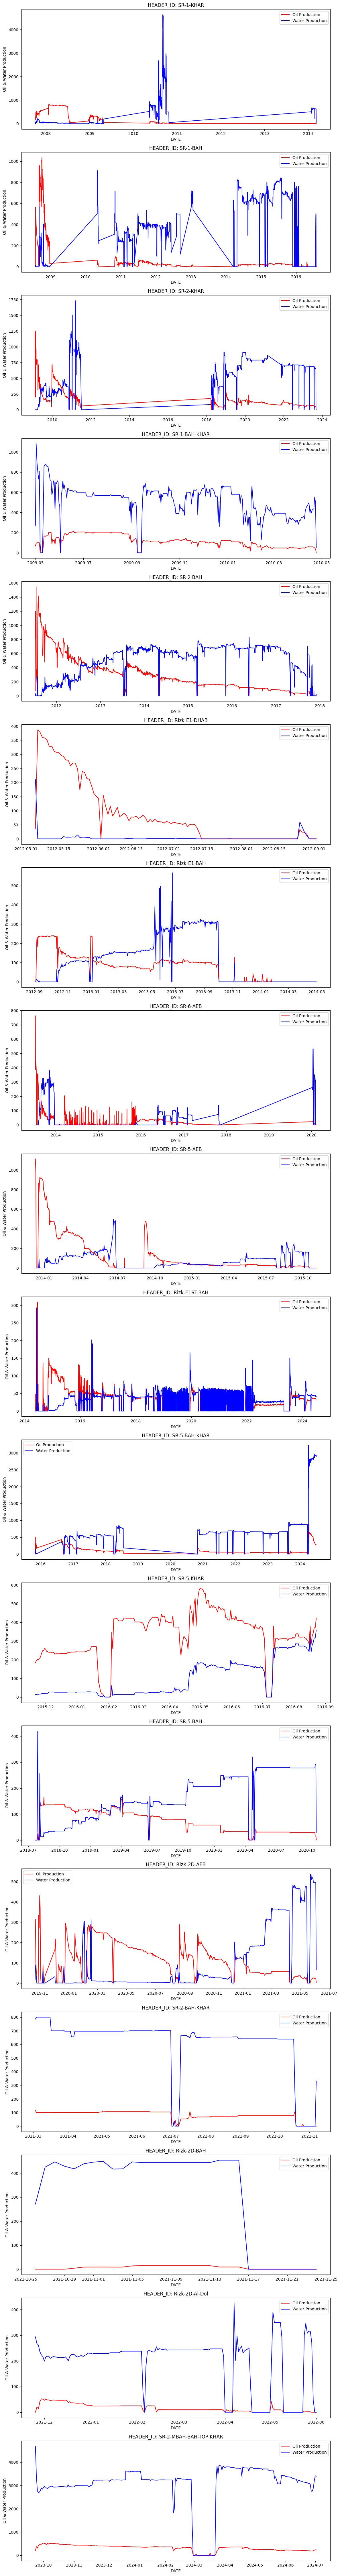

In [49]:
import matplotlib.pyplot as plt

# Get unique HEADER_IDs
header_ids = df["HEADER_ID"].unique()

# Set the figure size based on the number of HEADER_IDs
plt.figure(figsize=(12, len(header_ids) * 5))

# Loop through each HEADER_ID and plot the data
for i, header_id in enumerate(header_ids):
    d = df[df["HEADER_ID"] == header_id]  # Filter the dataframe by HEADER_ID
    
    plt.subplot(len(header_ids), 1, i + 1)  # Create a subplot for each HEADER_ID
    plt.plot(d["DATE"], d["ALLOCATED_OIL"], color='r', label='Oil Production')
    plt.plot(d["DATE"], d["ALLOCATED_WATER"], color='b', label='Water Production')
    
    plt.title(f'HEADER_ID: {header_id}')  # Title for each subplot
    plt.xlabel("DATE")
    plt.ylabel("Oil & Water Production")
    plt.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
# Group by 'Well' and 'zone' and sum the 'ALLOCATED_OIL'
df_agg = df.groupby(['Well', 'zone'])['ALLOCATED_OIL'].sum().reset_index()

# Create the stacked bar chart with labels
fig = px.bar(df_agg, 
             x='Well', 
             y='ALLOCATED_OIL', 
             color='zone',
             title='Stacked Bar Chart: Total Oil Produced by Well From Each Zone',
             labels={'ALLOCATED_OIL': 'Oil Production', 'Well': 'Well Name', 'zone': 'Zone'},
             color_discrete_sequence=px.colors.qualitative.D3)
             
fig.update_traces(texttemplate='%{y:,.1f}', textposition='inside')


# Update the layout for better readability
fig.update_layout(
    xaxis_title='Well',
    yaxis_title='Oil Production',
    legend_title='Zone',
    barmode='stack',
    width=1000,
    height=700
)

# Show the chart
fig.show()

In [51]:
#df = pd.DataFrame(company.values, index=company.index, columns=['Well', 'Total'])
company_oil = df.groupby('Well')['ALLOCATED_OIL'].sum().reset_index()

# Create the pie chart
fig_o = px.pie(company_oil, names='Well', values='ALLOCATED_OIL', 
               labels={"Well": "Well", 'ALLOCATED_OIL': "Total oil production (bbls)"},
               title="Contribution of each well in oil production")

# Update traces
fig_o.update_traces(textposition='inside', textinfo='percent+label',
                    hoverinfo='percent+label',
                    marker=dict(line=dict(color='#000000', width=2)))

# Update layout
fig_o.update_layout(
    title_x=0.5, title_font_size=20,
    paper_bgcolor="#0C2D42", font_color="#fff",
    legend_title_text="Wells", legend_title_font_size=14,
    width=1000,
    height=600
)

# Show the figure
fig_o.show()

In [52]:
#df = pd.DataFrame(company.values, index=company.index, columns=['Well', 'Total'])
company_oil = df.groupby('Well')['ALLOCATED_WATER'].sum().reset_index()

# Create the pie chart
fig_o = px.pie(company_oil, names='Well', values='ALLOCATED_WATER', 
               labels={"Well": "Well", 'ALLOCATED_WATER': "Total oil production (bbls)"},
               title="Contribution of each well in water production")

# Update traces
fig_o.update_traces(textposition='inside', textinfo='percent+label',
                    hoverinfo='percent+label',
                    marker=dict(line=dict(color='#000000', width=2)))

# Update layout
fig_o.update_layout(
    title_x=0.5, title_font_size=20,
    paper_bgcolor="#0C2D42", font_color="#fff",
    legend_title_text="Wells", legend_title_font_size=14,
    width=1000,
    height=600
)

# Show the figure
fig_o.show()

In [53]:
df.dtypes

HEADER_ID                     object
Well                          object
DATE                  datetime64[ns]
Well Head Pressure           float64
ALLOCATED_OIL                float64
ALLOCATED_GAS                float64
ALLOCATED_WATER              float64
GOR                          float64
Hours Day                    float64
Artifical Lift                object
zone                          object
field                         object
X                            float64
Y                            float64
WELL_DEPTH                   float64
TOTAL_FLUID                  float64
WATER_CUT                    float64
dtype: object

In [54]:
df['year']=df['DATE'].dt.year
df_oil=df.groupby('Well').agg({'ALLOCATED_OIL':'sum', 'year':['min','max']})
df_oil.columns=['Total_oil_production','Start_Date','End_Date']
df_oil=df_oil.sort_values('Total_oil_production', ascending=False).reset_index()
df_oil

C:\Users\noure\AppData\Local\Temp\ipykernel_25684\1865520849.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Well,Total_oil_production,Start_Date,End_Date
0,SR-2,1194786.8,2009,2024
1,SR-5,434390.7,2013,2024
2,SR-1,366366.0,2007,2016
3,RIZK-E1ST,141085.6,2014,2024
4,RIZK-2D,68108.7,2019,2022
5,RIZK-E1,56506.1,2012,2014
6,SR-6,35652.8,2013,2020


In [55]:
df['year']=df['DATE'].dt.year
df_final=df.groupby(['Well','zone']).agg({'ALLOCATED_OIL': 'sum', 'ALLOCATED_WATER':'sum','ALLOCATED_GAS': 'sum',
                                     'year':['min', 'max']}).reset_index()
df_final.columns=['Well_Name', 'Zone','Total_oil','Total_water','Total_gas','Start_Date','End_Date']
df_final=df_final.sort_values(['Well_Name','Start_Date']).reset_index(drop=True)
df_final

C:\Users\noure\AppData\Local\Temp\ipykernel_25684\3942316431.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Well_Name,Zone,Total_oil,Total_water,Total_gas,Start_Date,End_Date
0,RIZK-2D,AEB,64736.8,54929.0,13370.0,2019,2021
1,RIZK-2D,AL-Dol,3161.8,36800.0,0.0,2021,2022
2,RIZK-2D,BAH,210.1,9520.0,0.0,2021,2021
3,RIZK-E1,BAH,46077.9,66994.0,0.0,2012,2014
4,RIZK-E1,DHAB,10428.2,452.0,0.0,2012,2012
5,RIZK-E1ST,BAH,141085.6,125723.8,0.0,2014,2024
6,SR-1,KHAR,225488.9,220300.0,119388.0,2007,2014
7,SR-1,BAH,98945.1,640717.0,23275.0,2008,2016
8,SR-1,BAH-KHAR,41932.0,184191.0,24473.1,2009,2010
9,SR-2,KHAR,428886.3,1514792.8,284381.0,2009,2023


In [56]:
df.columns

Index(['HEADER_ID', 'Well', 'DATE', 'Well Head Pressure', 'ALLOCATED_OIL',
       'ALLOCATED_GAS', 'ALLOCATED_WATER', 'GOR', 'Hours Day',
       'Artifical Lift', 'zone', 'field', 'X', 'Y', 'WELL_DEPTH',
       'TOTAL_FLUID', 'WATER_CUT', 'year'],
      dtype='object')

In [57]:
#create for loop to get index of each column
#for i, x in enumerate(df):
    #print(i,x)

In [58]:
#final=df.iloc[:,[1,5,6,10,11,15,16]]
#new_df=pd.merge(df_final,final, how='left',left_on='Well_Name',right_on='Well')


In [59]:
sum_oil = df1.groupby('Well')['ALLOCATED_OIL'].sum().reset_index()
sum_oil = sum_oil.rename(columns={'Well':'WELL'})
sum_oil

,WELL,ALLOCATED_OIL
0,RIZK-2D,67644.7
1,RIZK-E1,56506.1
2,RIZK-E1ST,127619.9
3,Rizk-2D,464.0
4,Rizk-E1ST,13465.7
5,SR-1,366366.0
6,SR-2,1194786.8
7,SR-5,434390.7
8,SR-6,35652.8


In [60]:
df_map = df2.drop_duplicates(subset='WELL')
df_map['WELL']=df_map['WELL'].str.upper()

C:\Users\noure\AppData\Local\Temp\ipykernel_25684\2666432629.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
final_map = pd.merge(df_map,sum_oil,on='WELL',how='left')
final_map

,Completion,WELL,zone,field,LONGITUDE,LATITUDE,X,Y,WELL_DEPTH,ALLOCATED_OIL
0,Rizk-2D-AEB,RIZK-2D,AEB,Rizk,NaN,NaN,425252.1,873814.7,17400,67644.7
1,Rizk-4ST-Al-Dol,RIZK-4ST,AL-Dol,Rizk,NaN,NaN,424883.8,873203.4,12205,NaN
2,Rizk-E1-BAH,RIZK-E1,BAH,Rizk,NaN,NaN,425163.4,874149.1,14756,56506.1
3,Rizk-E1ST-BAH,RIZK-E1ST,BAH,Rizk,NaN,NaN,425163.4,874149.1,9807,127619.9
4,SR-1-BAH,SR-1,BAH,SR,NaN,NaN,409966.0,909089.0,14381,366366.0
5,SR-2-BAH,SR-2,BAH,SR,NaN,NaN,409828.7,909097.2,9540,1194786.8
6,SR-3-PA,SR-3,PA,SR,NaN,NaN,410326.8,909340.9,8600,NaN
7,SR-4-PA,SR-4,PA,SR,NaN,NaN,409000.0,909200.0,11850,NaN
8,SR-5-AEB,SR-5,AEB,SR,NaN,NaN,409720.0,909160.0,10300,434390.7
9,SR-6-AEB,SR-6,AEB,SR,NaN,NaN,409880.0,908965.0,10300,35652.8


In [62]:
final_map = final_map.dropna(subset='ALLOCATED_OIL')
final_map

,Completion,WELL,zone,field,LONGITUDE,LATITUDE,X,Y,WELL_DEPTH,ALLOCATED_OIL
0,Rizk-2D-AEB,RIZK-2D,AEB,Rizk,NaN,NaN,425252.1,873814.7,17400,67644.7
2,Rizk-E1-BAH,RIZK-E1,BAH,Rizk,NaN,NaN,425163.4,874149.1,14756,56506.1
3,Rizk-E1ST-BAH,RIZK-E1ST,BAH,Rizk,NaN,NaN,425163.4,874149.1,9807,127619.9
4,SR-1-BAH,SR-1,BAH,SR,NaN,NaN,409966.0,909089.0,14381,366366.0
5,SR-2-BAH,SR-2,BAH,SR,NaN,NaN,409828.7,909097.2,9540,1194786.8
8,SR-5-AEB,SR-5,AEB,SR,NaN,NaN,409720.0,909160.0,10300,434390.7
9,SR-6-AEB,SR-6,AEB,SR,NaN,NaN,409880.0,908965.0,10300,35652.8


In [63]:
rizk = final_map[final_map['field']=='Rizk']

In [64]:
sidi = final_map[final_map['field']=='SR']
sidi

,Completion,WELL,zone,field,LONGITUDE,LATITUDE,X,Y,WELL_DEPTH,ALLOCATED_OIL
4,SR-1-BAH,SR-1,BAH,SR,NaN,NaN,409966.0,909089.0,14381,366366.0
5,SR-2-BAH,SR-2,BAH,SR,NaN,NaN,409828.7,909097.2,9540,1194786.8
8,SR-5-AEB,SR-5,AEB,SR,NaN,NaN,409720.0,909160.0,10300,434390.7
9,SR-6-AEB,SR-6,AEB,SR,NaN,NaN,409880.0,908965.0,10300,35652.8


In [65]:
def create_scatter_plot(df):
    scatter_plot = px.scatter(df, 
                              x='X', 
                              y='Y', 
                              size='ALLOCATED_OIL', 
                              text='WELL',  # Add labels to the points
                              title='Scatter Plot with Bubble Size Based on Allocated Oil',
                              width=1300, 
                              height=600,
                              size_max=60)
    
    # Customize the text position (optional)
    scatter_plot.update_traces(textposition='top center')
    
    scatter_plot.show()


# Example usage:
create_scatter_plot(sidi)

In [66]:
df['WATER_CUT'].mean()

0.6467192244890779